In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
import sys
sys.path.insert(1,"../")
from visualize import plot_grid_search,plot_grid_search_test,filter_df,filter_df_test,get_concat_losses,get_inputs_linreg,plot_losses_fits
from statistics import student_test
import ast

In [4]:
code

NameError: name 'code' is not defined

In [5]:
fontsize = 25

# Visualizations of Losses

NameError: name 'df' is not defined

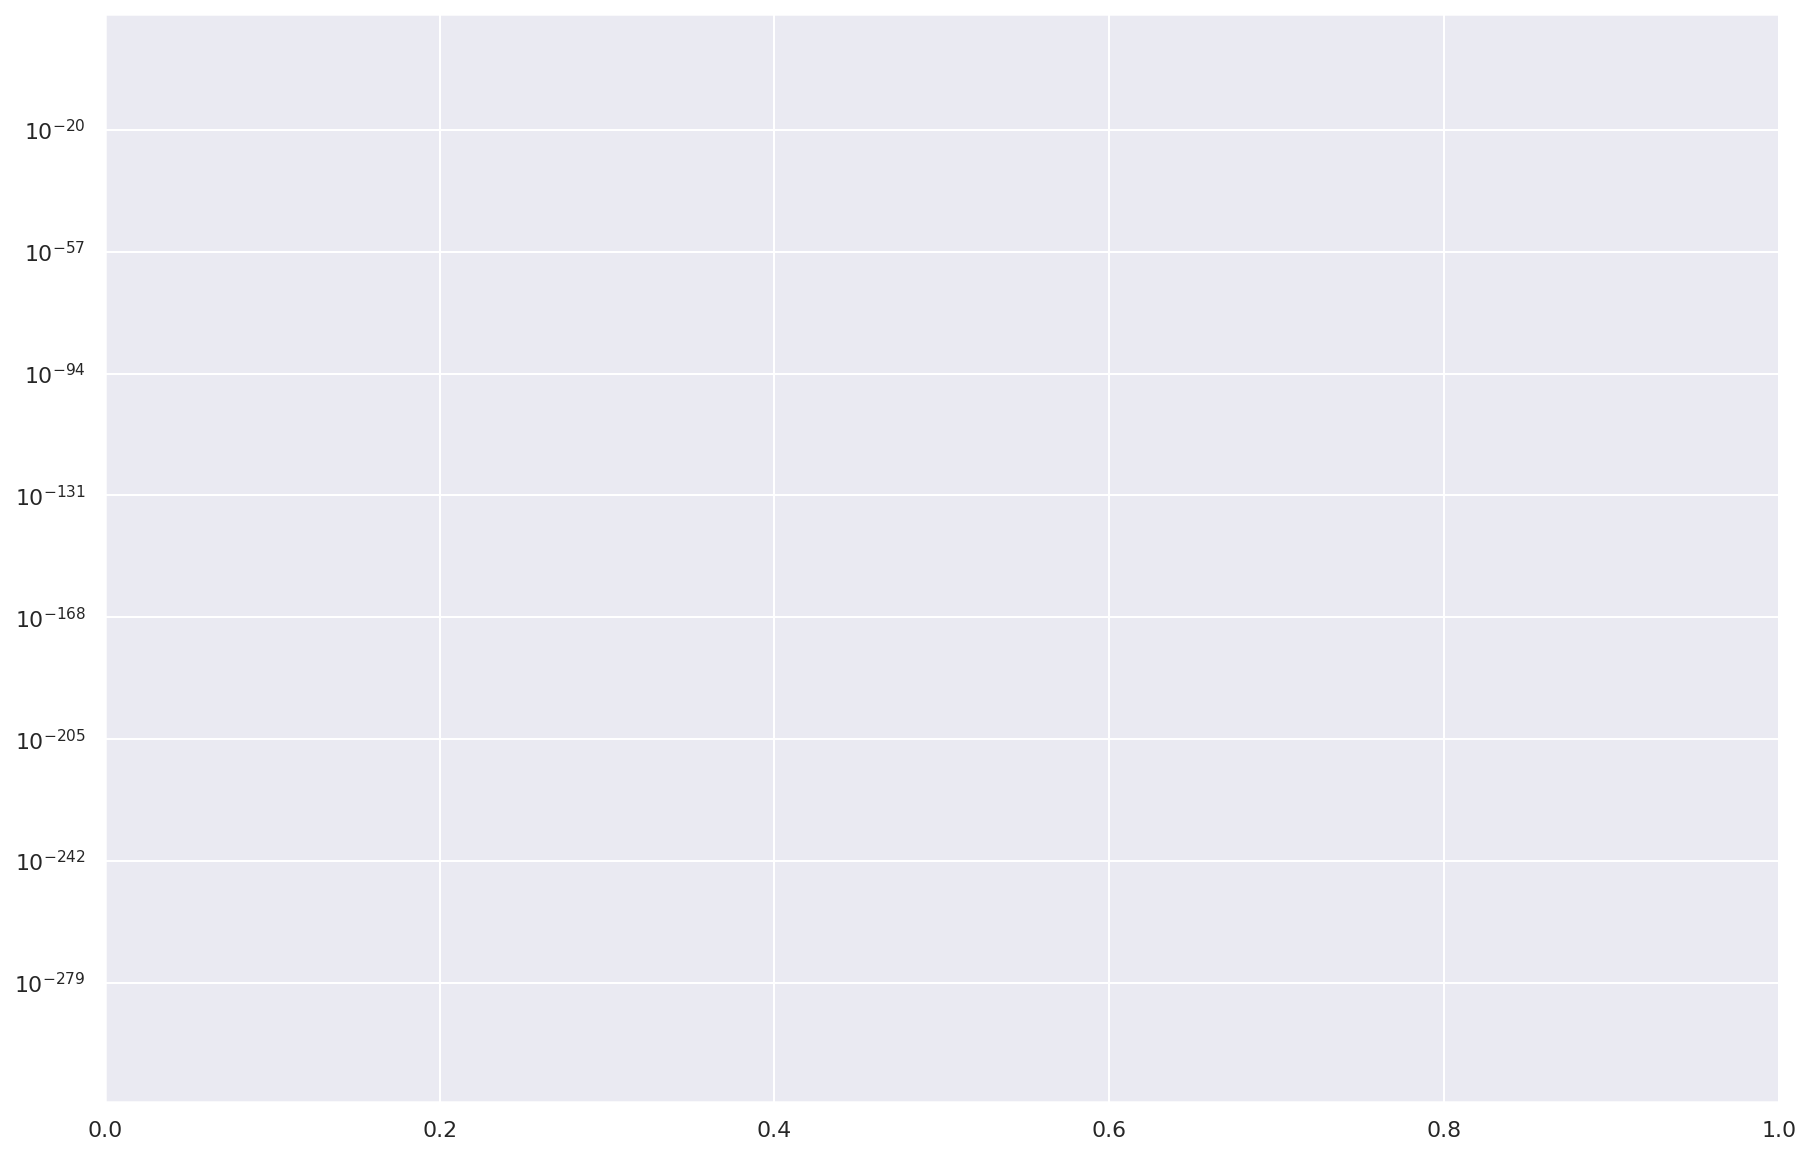

In [6]:
fig,ax = plt.subplots(1,figsize=(15,10))
# chose the scale on the axis (linear or log)
ax.set_yscale('log')
#ax.set_xscale('log')
plot_grid_search(df,ax,
                 plot_SGD=False,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="log",
                 plot_mean=True,
                 train=False)
ax.set_title("Runs of GS Image Dataset (Validation)", fontsize=fontsize)
ax.set_ylabel('Cross Entropy Loss', fontsize=fontsize)
ax.set_xlabel('Epochs', fontsize=fontsize)
fig.savefig("../../results/images_gridsearch_val.png", fontsize=fontsize)

In [ ]:
df = pd.read_json("../../log/log_images_results.json")
df = filter_df_test(df)
fig,ax = plt.subplots(1,figsize=(15,10))
# chose the scale on the axis (linear or log)
ax.set_yscale('log')
#ax.set_xscale('log')
plot_grid_search_test(df,ax,
                 plot_SGD=False,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=True,
                 fit_type="log",
                 plot_mean=True,
                 train=False)
ax.set_title("Runs of Image Dataset (Val)", fontsize=30)
ax.set_ylabel('Cross Entropy Loss', fontsize=30)
ax.set_xlabel('Epochs', fontsize=30)
fig.savefig("../../results/test_images_val.png")

## Text Dataset

In [7]:
# train-validation data
df_text = pd.read_json("../../log/log_text_results.json")
df_text_test = filter_df_test(df_text)
df_text = filter_df(df_text)

### Train-Validation set

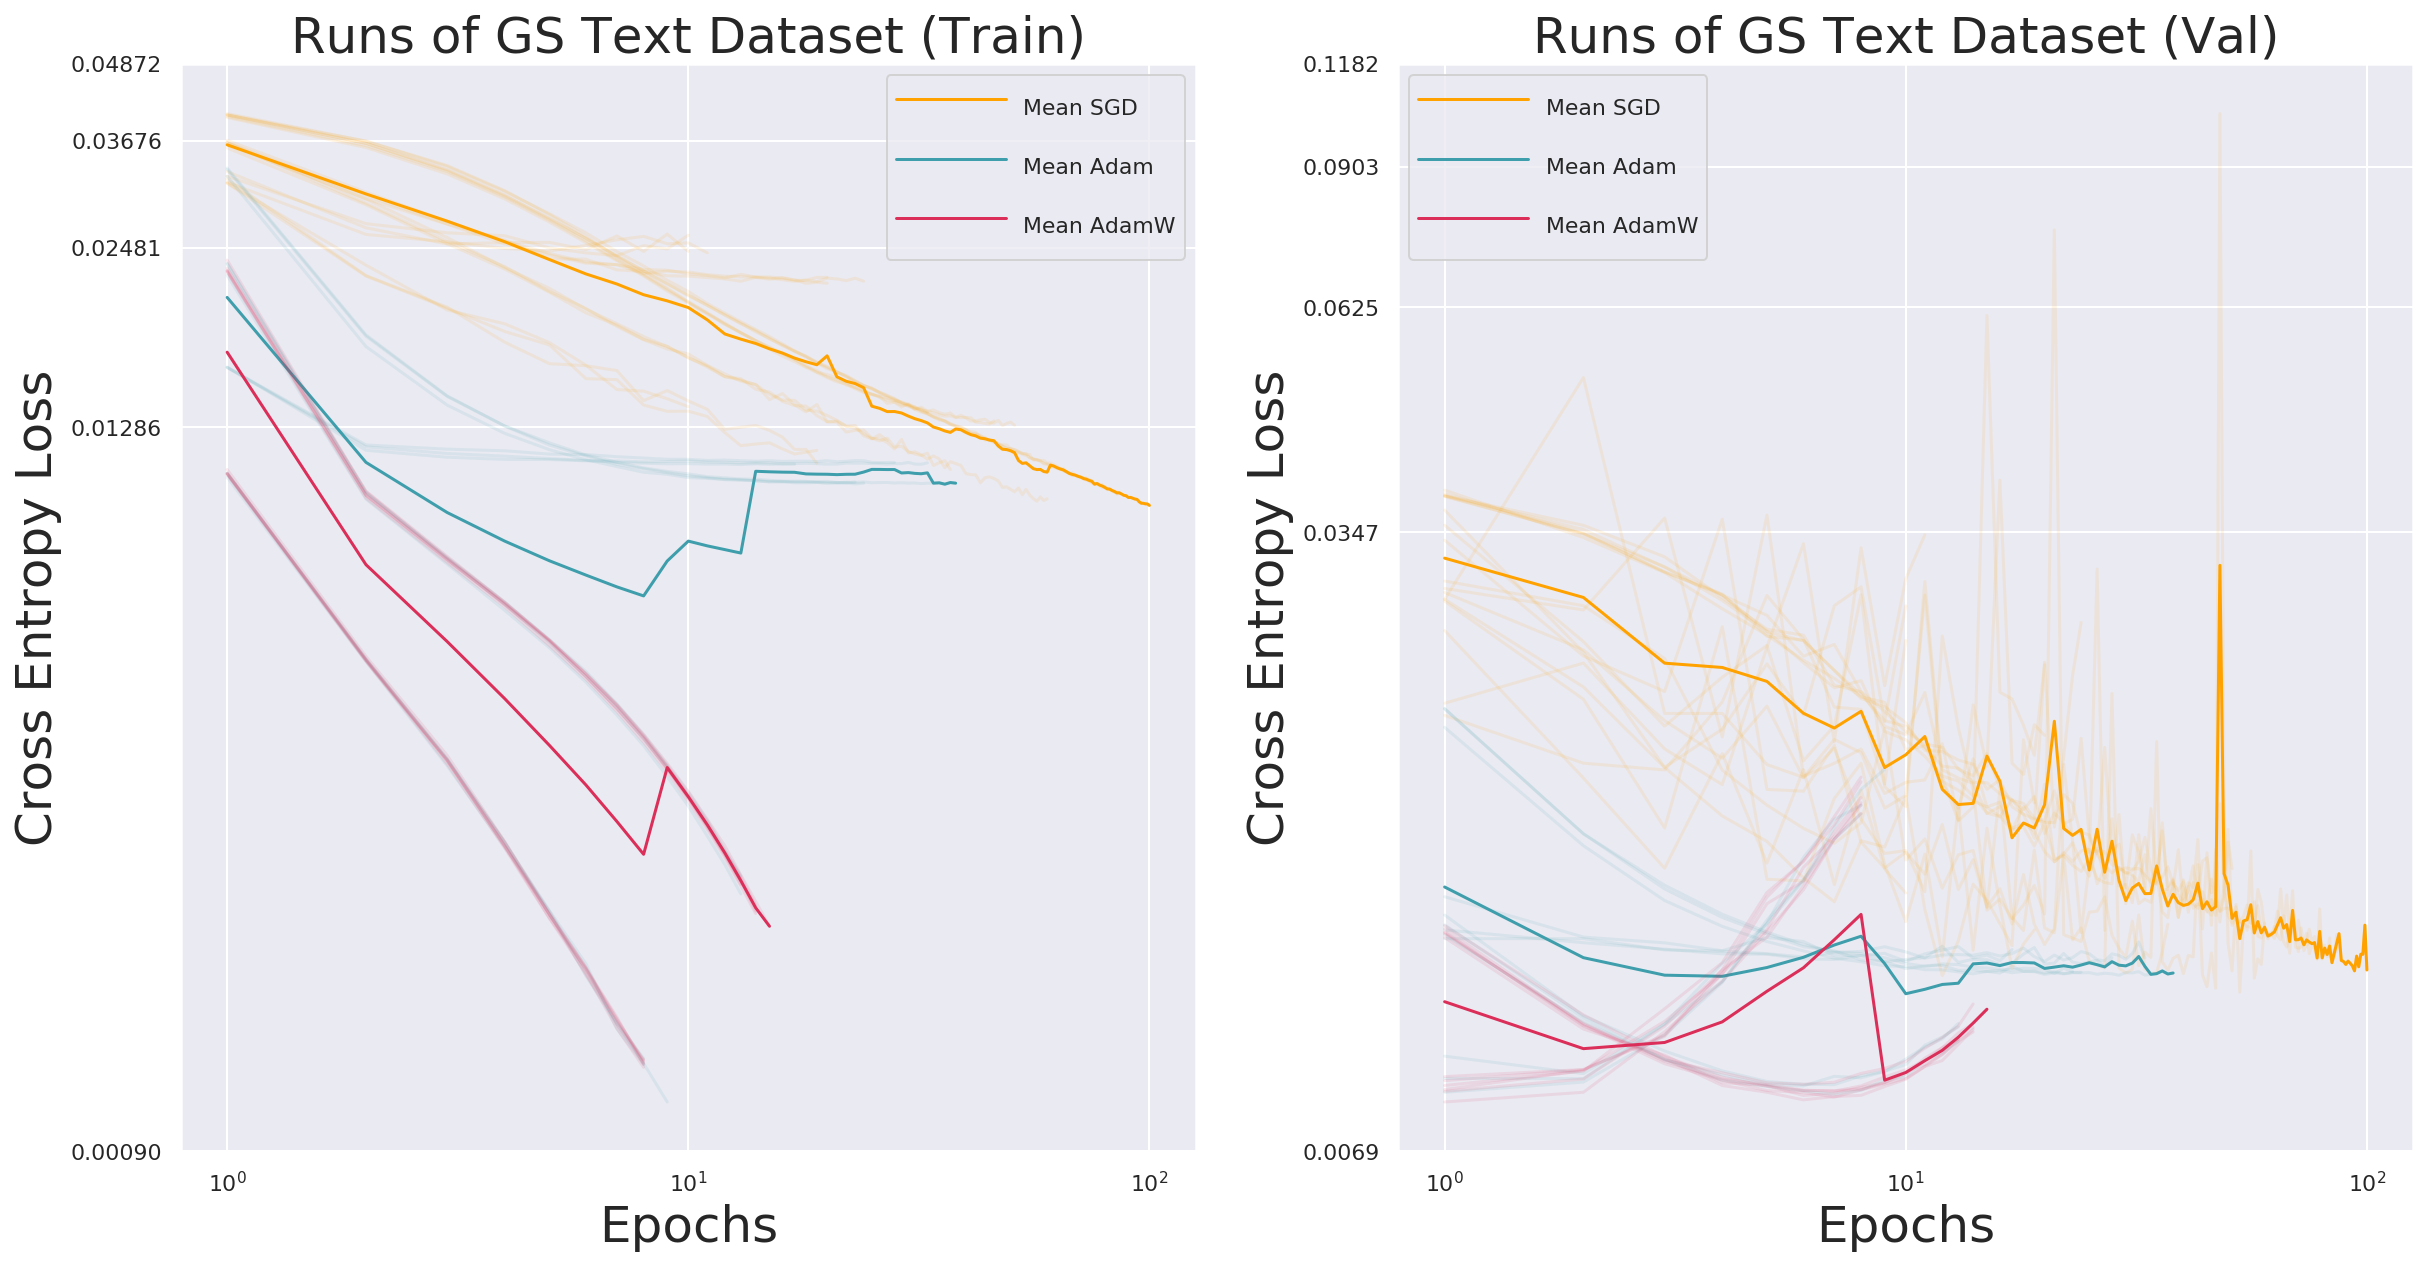

In [32]:
fontsize = 25
df_text = pd.read_json("../../log/log_text_results.json")
df_text = filter_df(df_text)
fig,axes = plt.subplots(1,2,figsize=(20,10))
# chose the scale on the axis (linear or log)
ax1,ax2 = axes

ax1.set_yscale('log')
ax1.set_xscale('log')
plot_grid_search(df_text,ax1,
                 plot_SGD=True,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="log",
                 plot_mean=True,
                 train=True)
ax1.set_title("Runs of GS Text Dataset (Train)", fontsize=fontsize)
ax1.set_ylabel('Cross Entropy Loss', fontsize=fontsize)
ax1.set_xlabel('Epochs', fontsize=fontsize)


ax2.set_yscale('log')
ax2.set_xscale('log')
plot_grid_search(df_text,ax2,
                 plot_SGD=True,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="log",
                 plot_mean=True,
                 train=False)
ax2.set_title("Runs of GS Text Dataset (Val)", fontsize=fontsize)
ax2.set_ylabel('Cross Entropy Loss', fontsize=fontsize)
ax2.set_xlabel('Epochs', fontsize=fontsize)

fig.savefig("../../results/text_gridsearch.png")

### Exploration of AdamW divergence

No handles with labels found to put in legend.
No handles with labels found to put in legend.


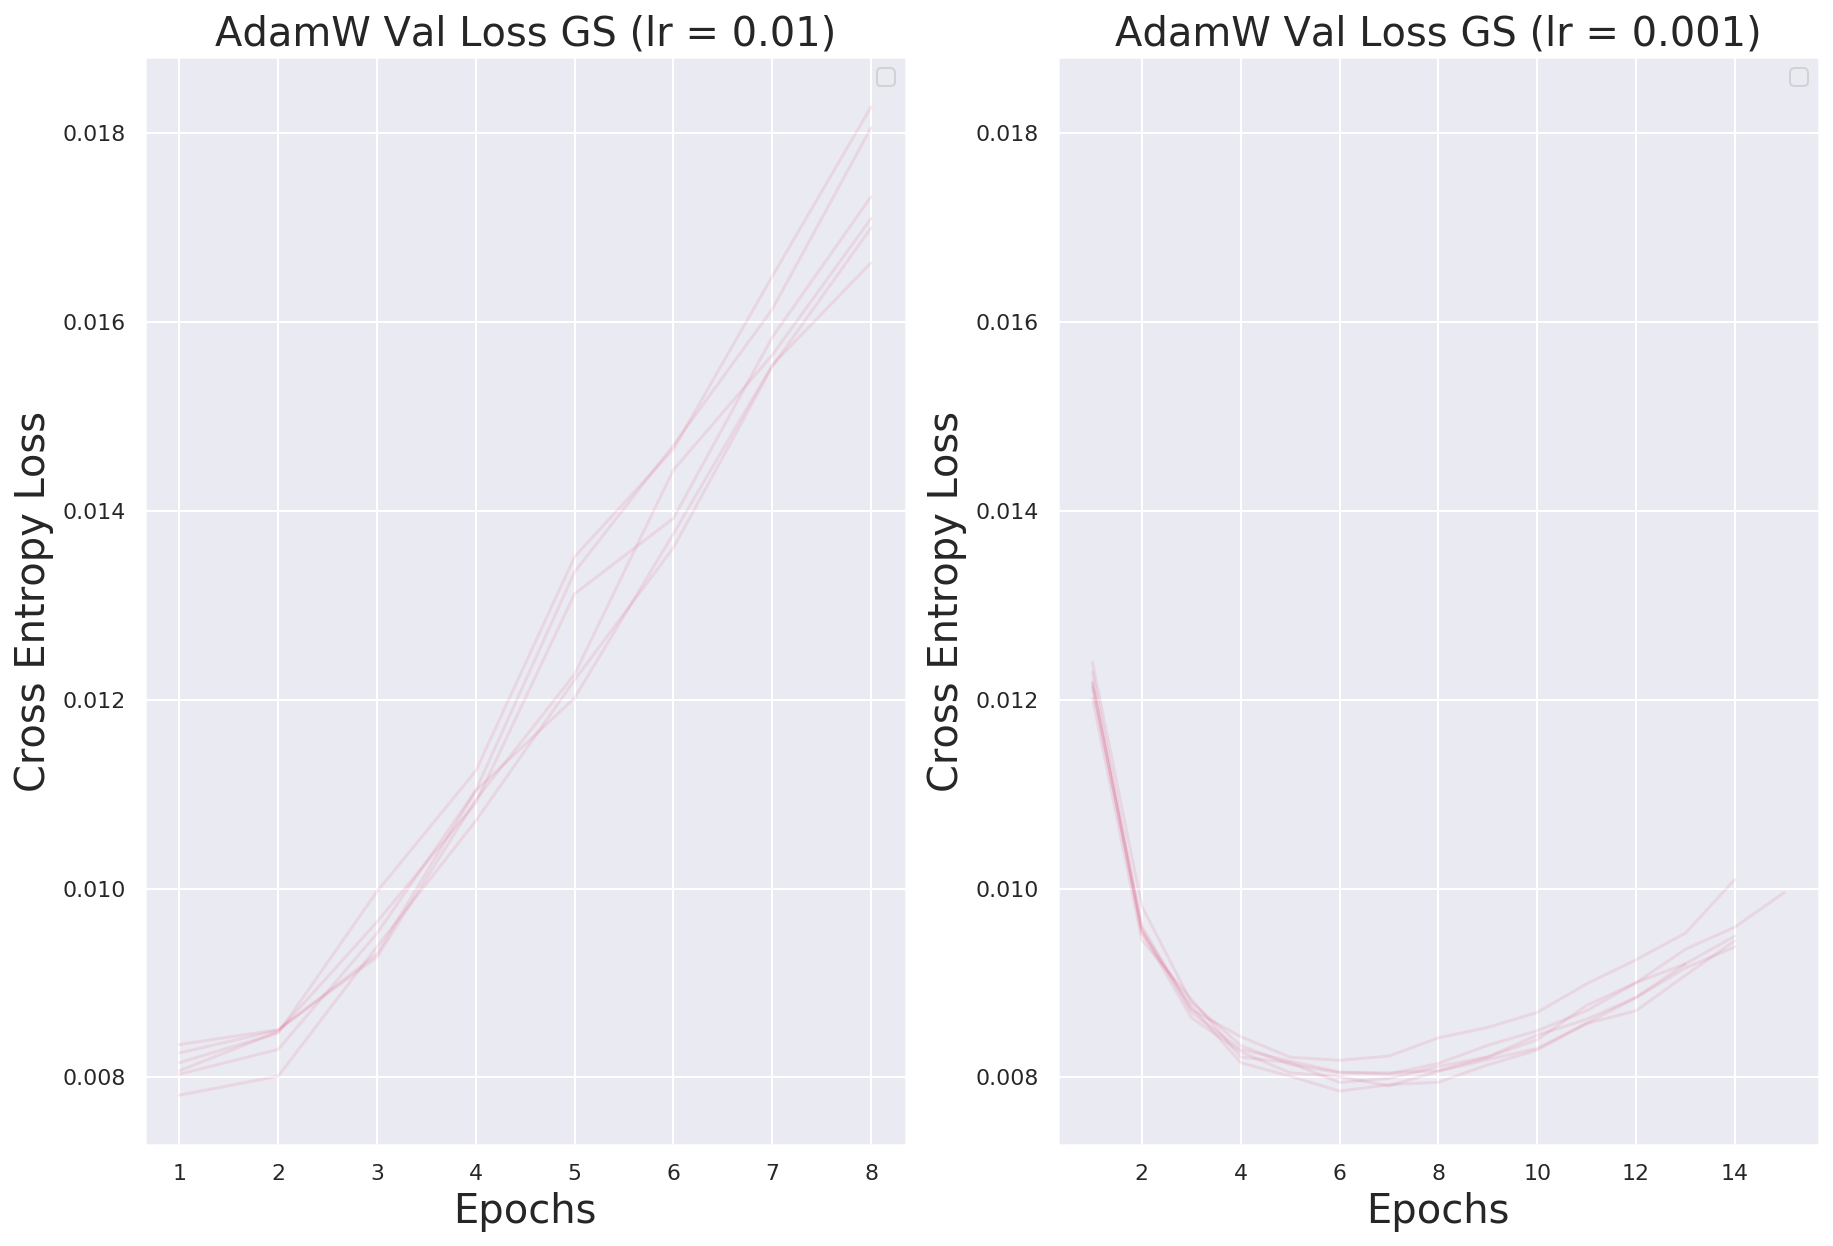

In [34]:
fontsize = 20
fig, axes = plt.subplots(1,2,figsize=(15,10))
ax1,ax2 = axes
df_adamW = df_text[df_text.optimizer == "AdamW"].copy()

df_test = df_adamW[(df_adamW.apply(lambda x: ast.literal_eval(x.param)['lr'] == 0.01,axis=1) 
                   )                   ]
losses = get_concat_losses(df_test,train=False)
plot_losses_fits(losses,ax1,("#db2e59","yellow"))
ax1.set_title("AdamW Val Loss GS (lr = 0.01)", fontsize=fontsize)
ax1.set_ylabel('Cross Entropy Loss', fontsize=fontsize)
ax1.set_xlabel('Epochs', fontsize=fontsize)
y_lim = ax1.get_ylim()

df_test = df_adamW[(df_adamW.apply(lambda x: ast.literal_eval(x.param)['lr'] == 0.001,axis=1) 
                   )                   ]
losses = get_concat_losses(df_test,train=False)
plot_losses_fits(losses,ax2,("#db2e59","yellow"))
ax2.set_title("AdamW Val Loss GS (lr = 0.001)", fontsize=fontsize)
ax2.set_ylabel('Cross Entropy Loss', fontsize=fontsize)
ax2.set_xlabel('Epochs', fontsize=fontsize)
ax2.set_ylim(y_lim)
fig.savefig("../../results/divergence_text.png")

### Test set

Text(0.5, 0, 'Epochs')

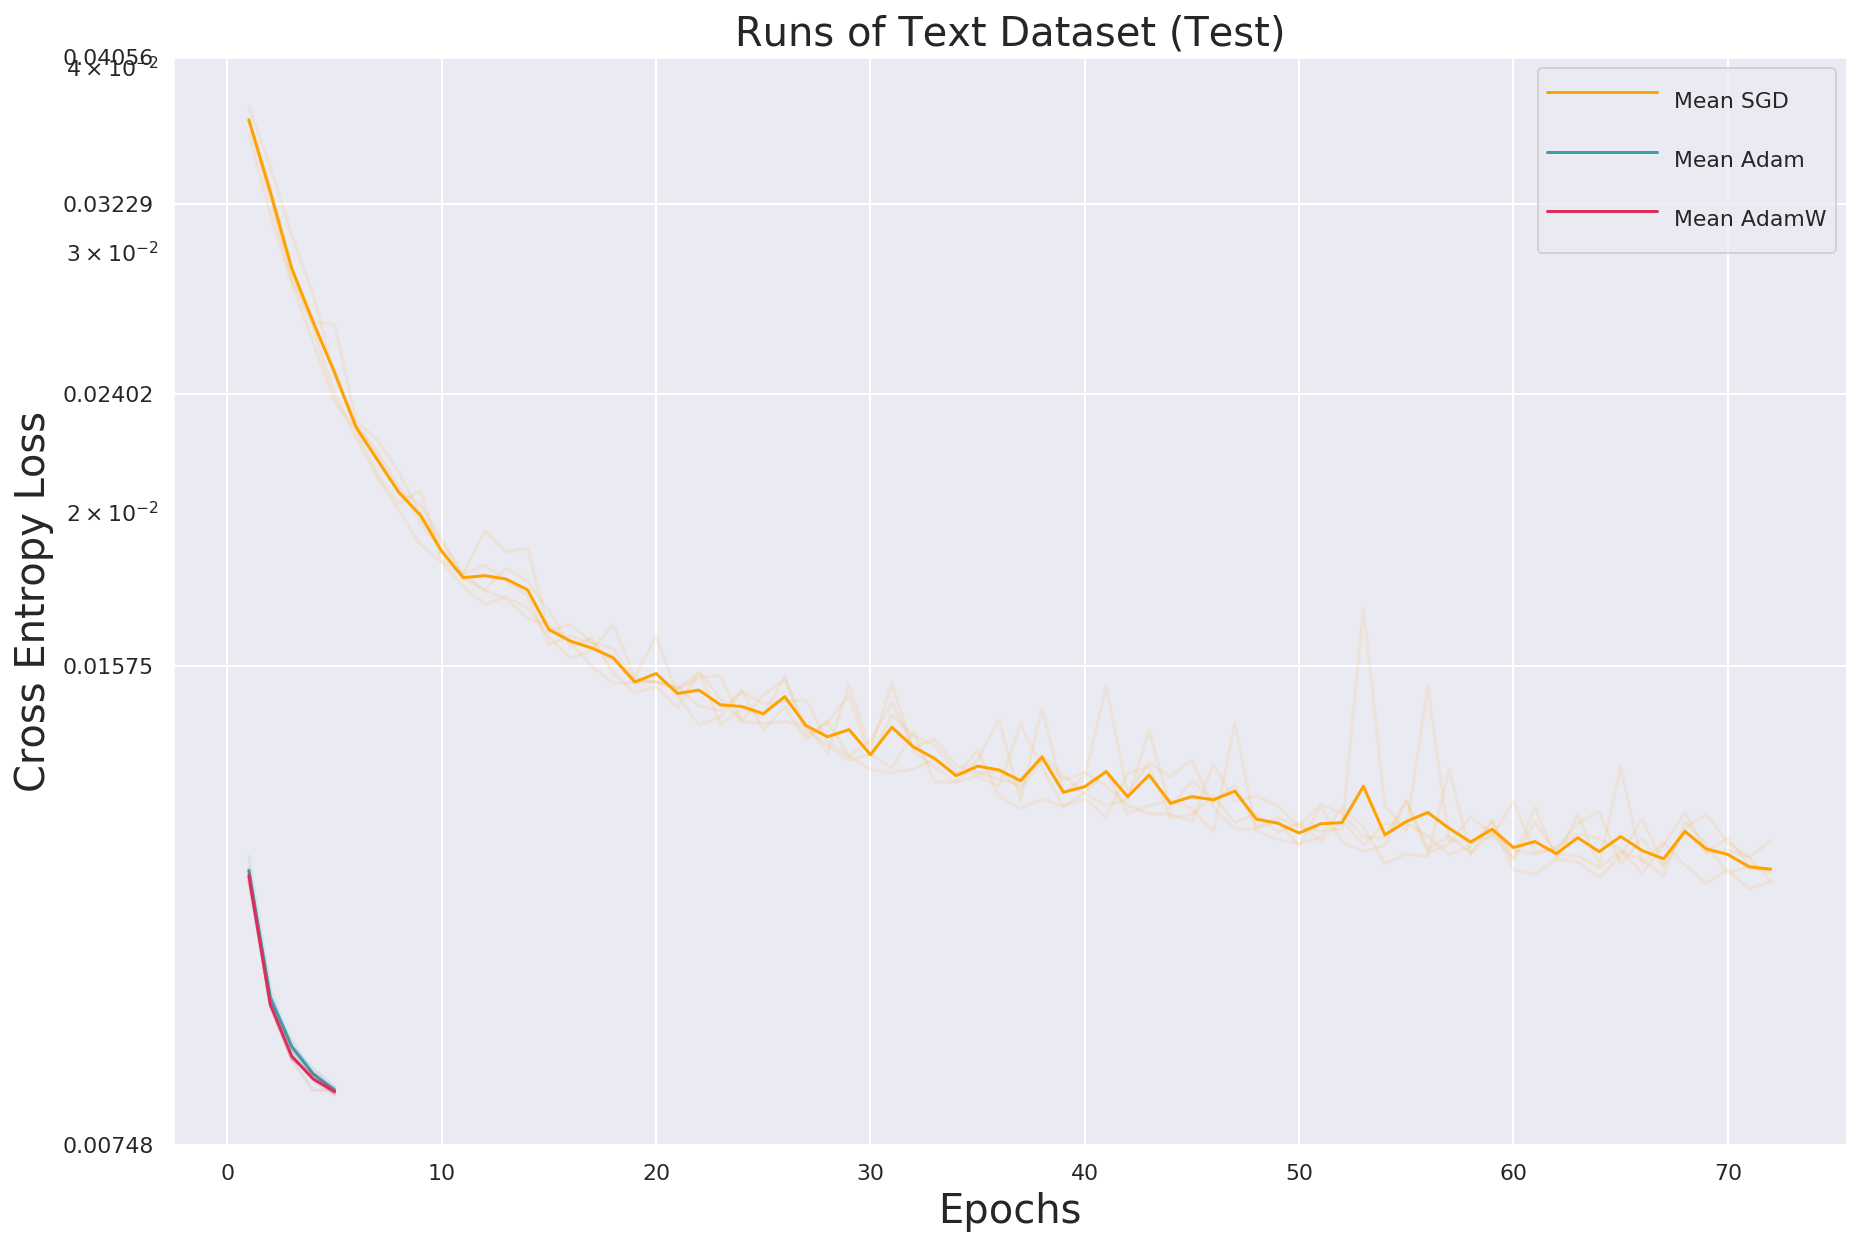

In [10]:
fig,ax = plt.subplots(1,figsize=(15,10))
# chose the scale on the axis (linear or log)
ax.set_yscale('log')
#ax.set_xscale('log')
plot_grid_search_test(df_text_test,ax,
                 plot_SGD=True,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="log",
                 plot_mean=True,
                 train=False)
ax.set_title("Runs of Text Dataset (Test)", fontsize=fontsize)
ax.set_ylabel('Cross Entropy Loss', fontsize=fontsize)
ax.set_xlabel('Epochs', fontsize=fontsize)
#fig.savefig("../../results/test_text_val.png")

## Image Dataset

In [11]:
df_image = pd.read_json("../../log/log_images_results.json")
# test data
df_image_test = filter_df_test(df_image)
# train-validation data
df_image = filter_df(df_image)

### Train-Validation set

Text(0.5, 0, 'Epochs')

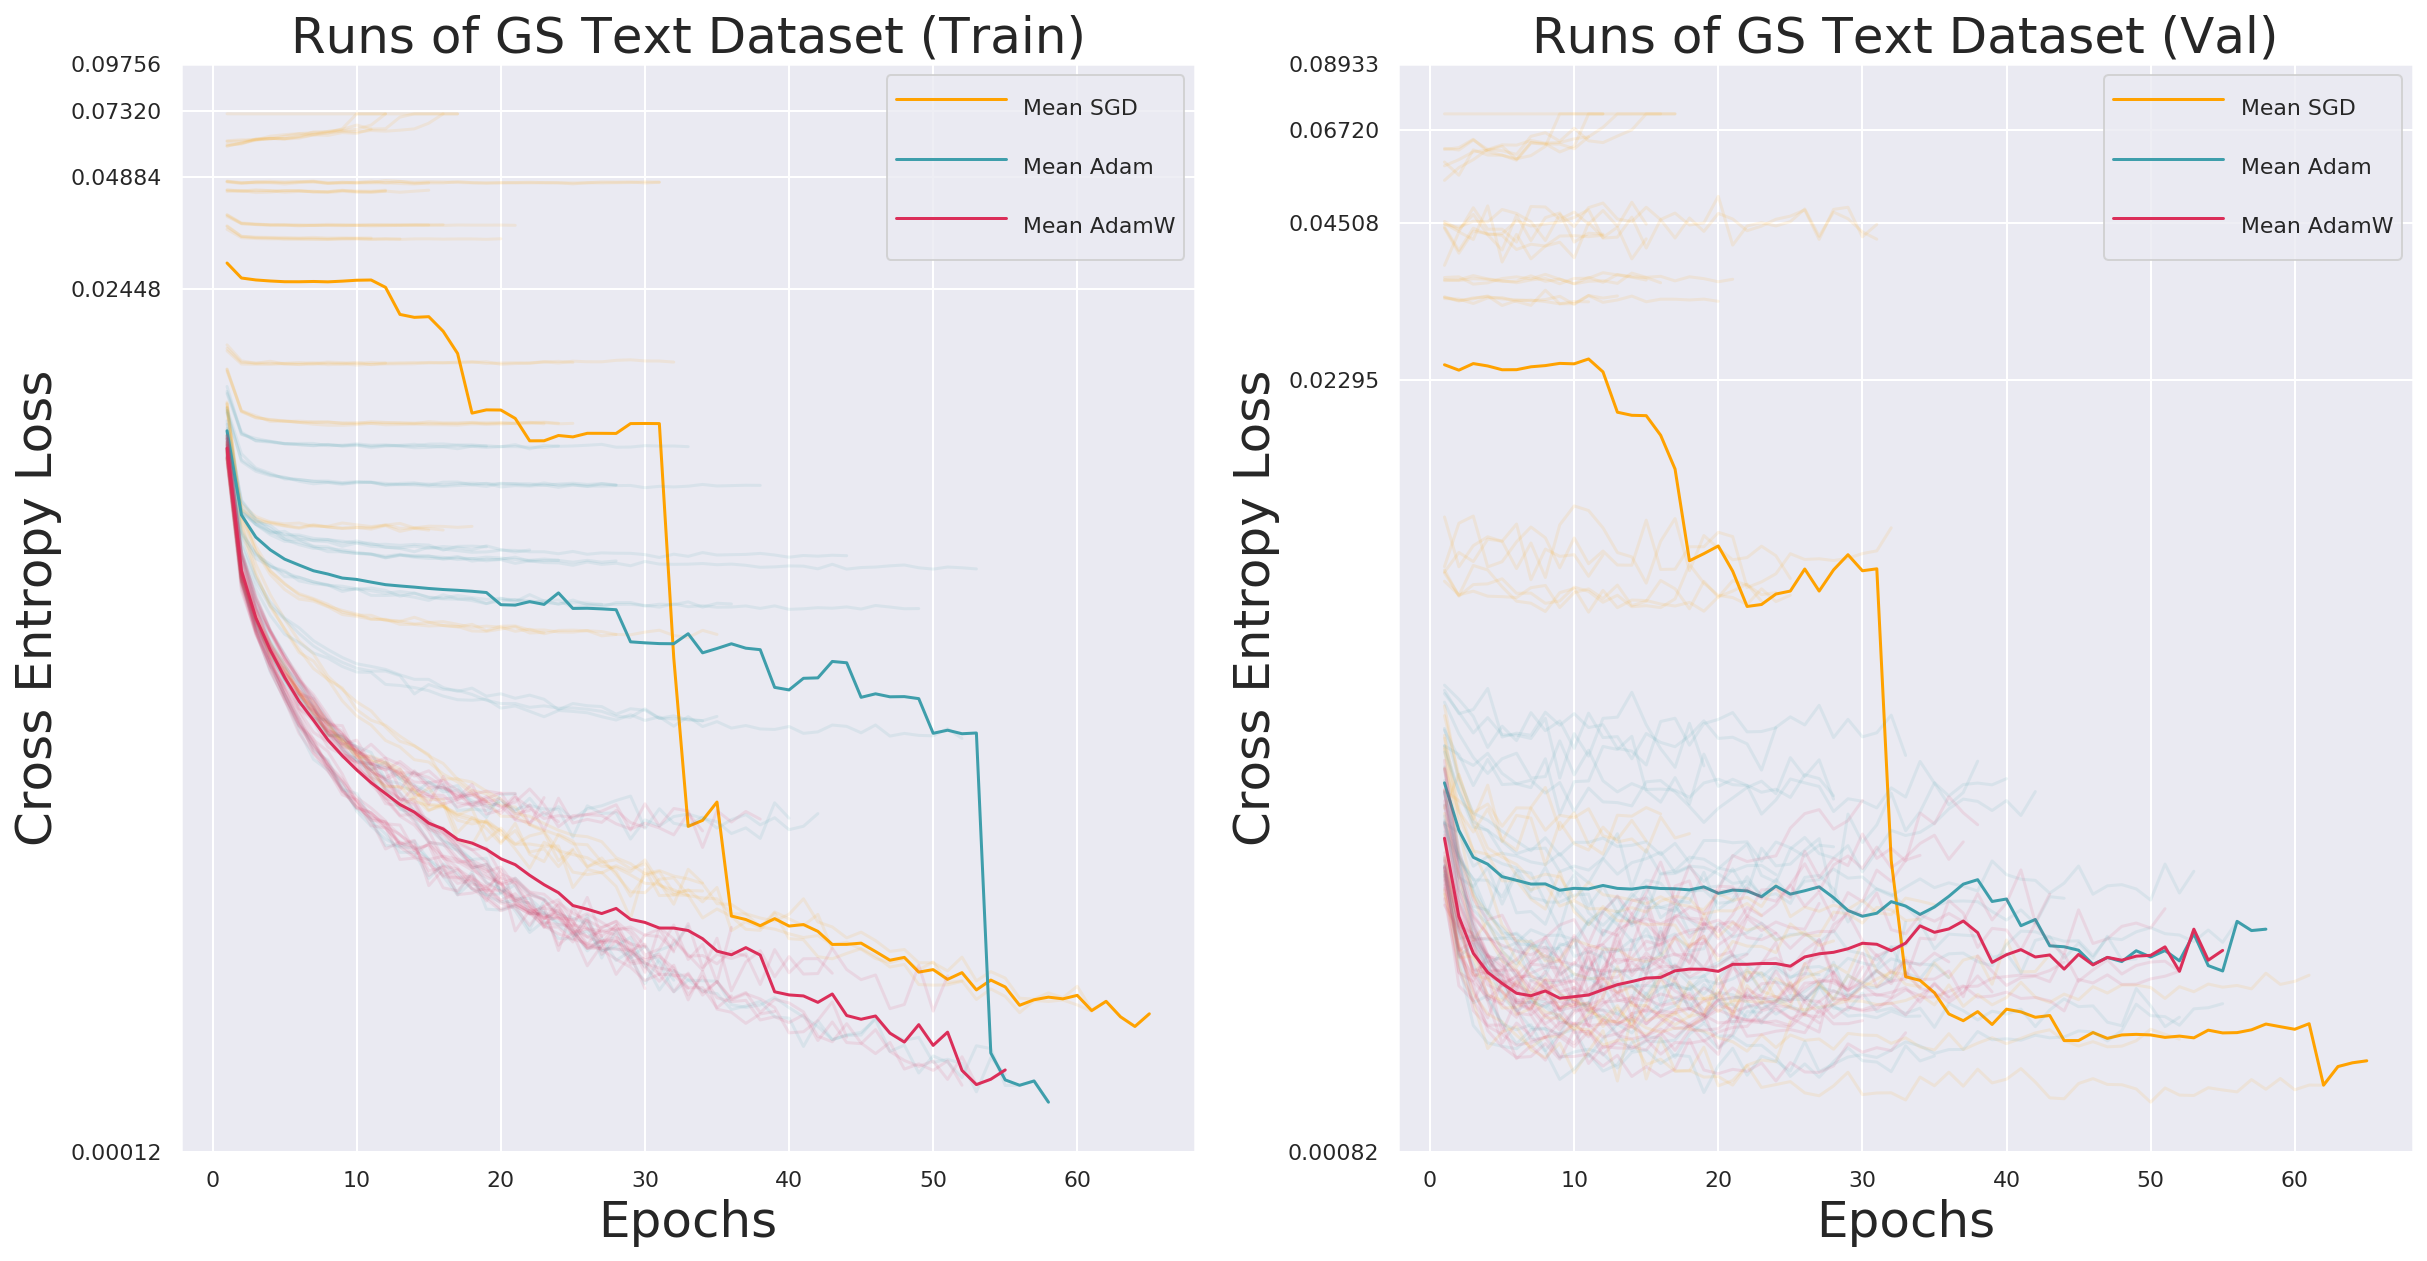

In [12]:
fontsize = 25
fig,axes = plt.subplots(1,2,figsize=(20,10))
# chose the scale on the axis (linear or log)
ax1,ax2 = axes

ax1.set_yscale('log')
#ax1.set_xscale('log')
plot_grid_search(df_image,ax1,
                 plot_SGD=True,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="log",
                 plot_mean=True,
                 train=True)
ax1.set_title("Runs of GS Text Dataset (Train)", fontsize=fontsize)
ax1.set_ylabel('Cross Entropy Loss', fontsize=fontsize)
ax1.set_xlabel('Epochs', fontsize=fontsize)


ax2.set_yscale('log')
#ax1.set_xscale('log')
plot_grid_search(df_image,ax2,
                 plot_SGD=True,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="log",
                 plot_mean=True,
                 train=False)
ax2.set_title("Runs of GS Text Dataset (Val)", fontsize=fontsize)
ax2.set_ylabel('Cross Entropy Loss', fontsize=fontsize)
ax2.set_xlabel('Epochs', fontsize=fontsize)

#fig.savefig("../../results/text_gridsearch.png")

### Adam vs AdamW

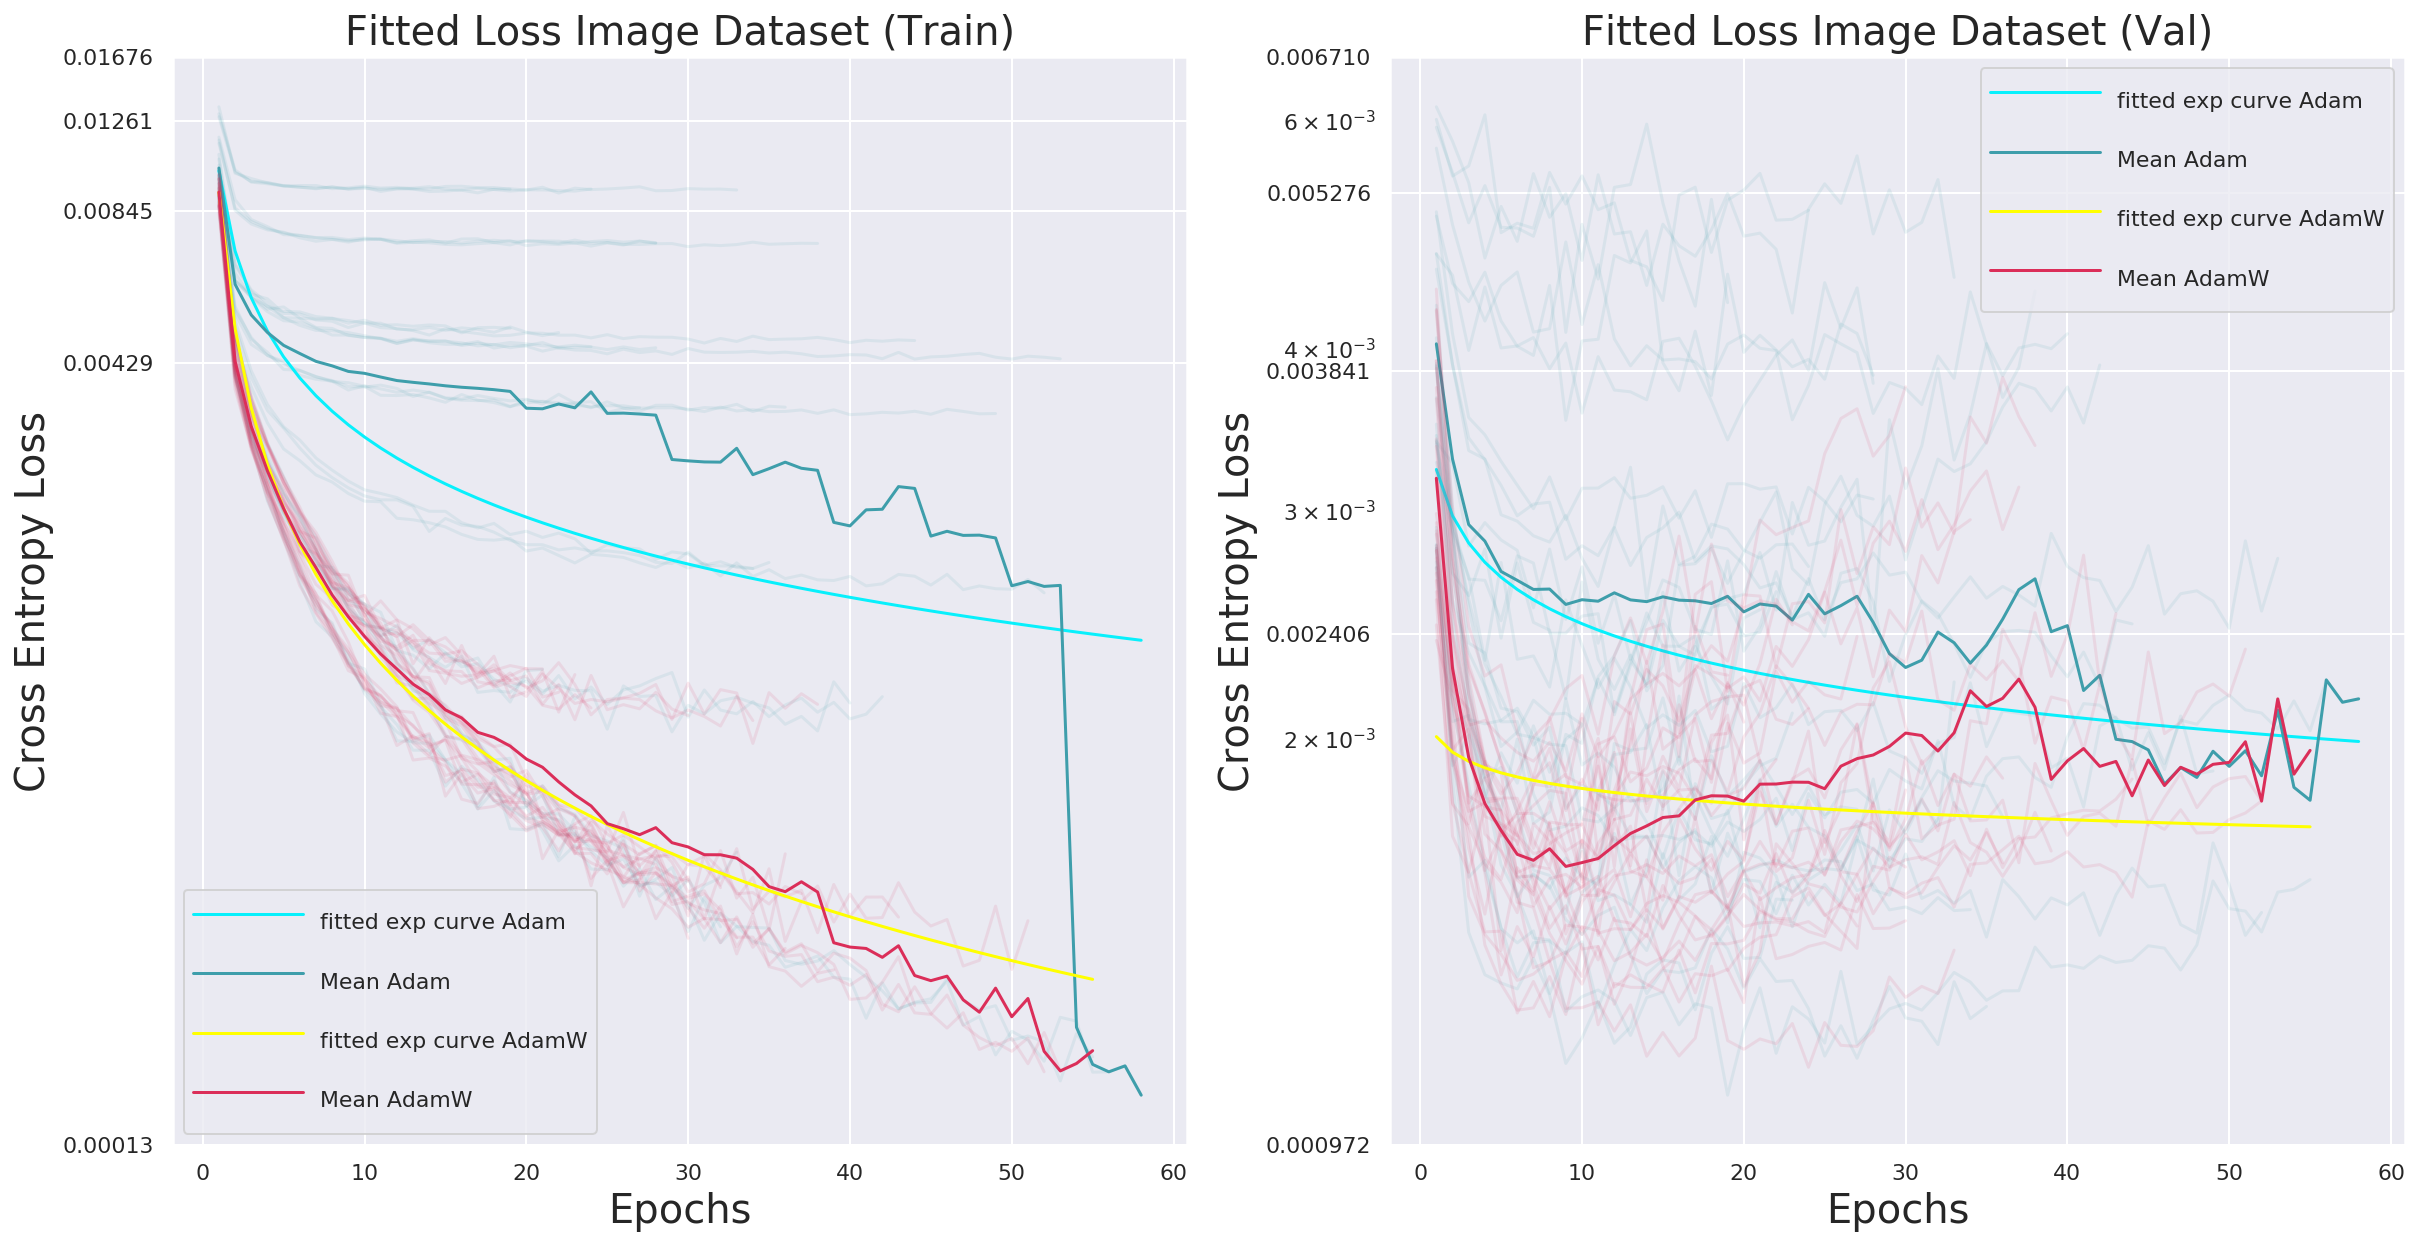

In [23]:
fontsize = 20
fig,axes = plt.subplots(1,2,figsize=(20,10))
# chose the scale on the axis (linear or log)
ax,ax2 = axes
ax.set_yscale('log')
#ax1.set_xscale('log')
plot_grid_search(df_image,ax,
                 plot_SGD=False,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=True,
                 fit_type="log",
                 plot_mean=True,
                 train=True)
ax.set_title("Fitted Loss Image Dataset (Train)", fontsize=fontsize)
ax.set_ylabel('Cross Entropy Loss', fontsize=fontsize)
ax.set_xlabel('Epochs', fontsize=fontsize)


ax2.set_yscale('log')
#ax1.set_xscale('log')
plot_grid_search(df_image,ax2,
                 plot_SGD=False,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=True,
                 fit_type="log",
                 plot_mean=True,
                 train=False)
ax2.set_title("Fitted Loss Image Dataset (Val)", fontsize=fontsize)
ax2.set_ylabel('Cross Entropy Loss', fontsize=fontsize)
ax2.set_xlabel('Epochs', fontsize=fontsize)

fig.savefig("../../results/fitted_image.png")

### Test set

Text(0.5, 0, 'Epochs')

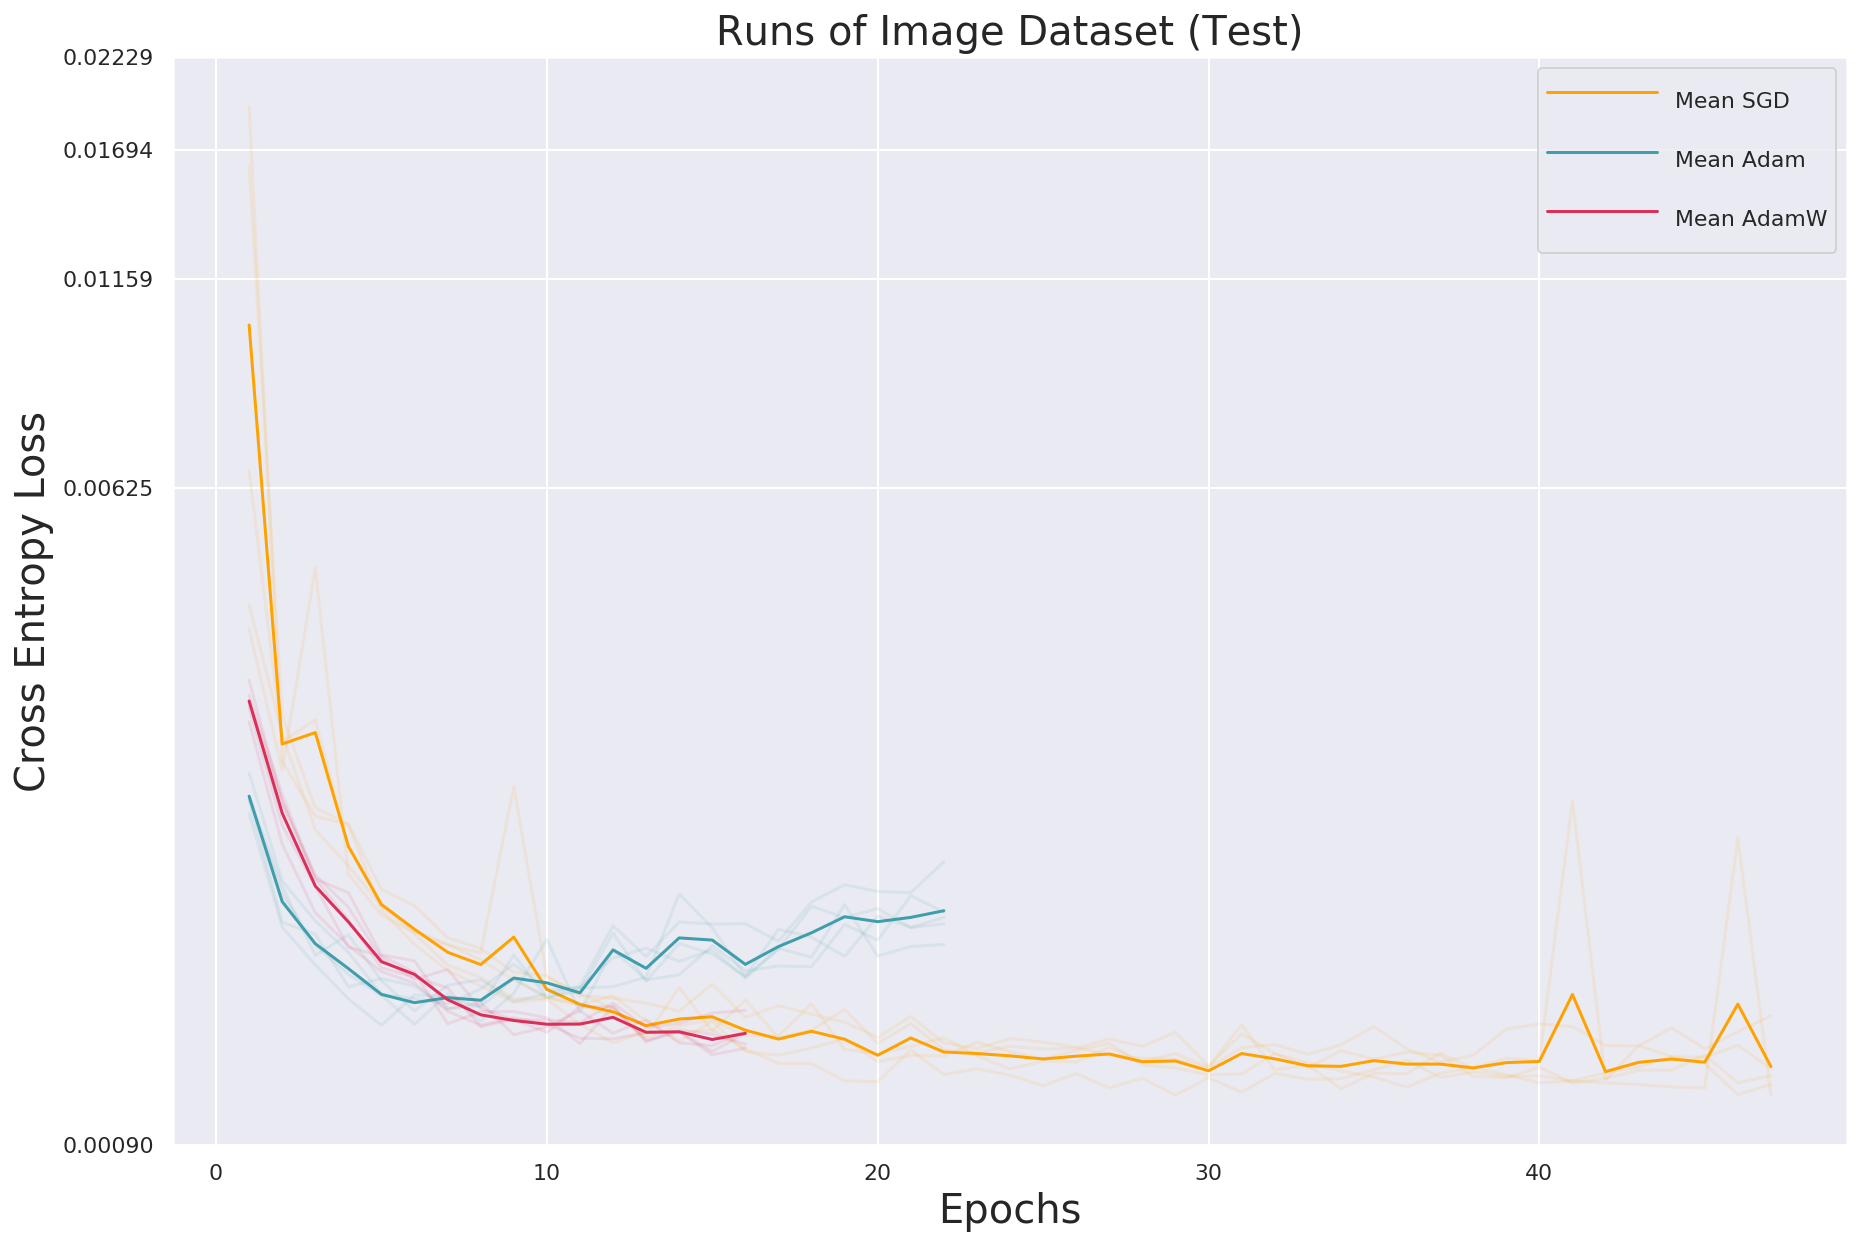

In [14]:
fig,ax = plt.subplots(1,figsize=(15,10))
# chose the scale on the axis (linear or log)
ax.set_yscale('log')
#ax.set_xscale('log')
plot_grid_search_test(df_image_test,ax,
                 plot_SGD=True,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="log",
                 plot_mean=True,
                 train=False)
ax.set_title("Runs of Image Dataset (Test)", fontsize=fontsize)
ax.set_ylabel('Cross Entropy Loss', fontsize=fontsize)
ax.set_xlabel('Epochs', fontsize=fontsize)
#fig.savefig("../../results/test_text_val.png")

### Statistic test

In [15]:
adam_df = df_image[df_image.optimizer == 'Adam']
adamW_df = df_image[df_image.optimizer == 'AdamW']
sgd_df = df_image[df_image.optimizer == 'SGD']
train = True
adam_concat_losses = get_concat_losses(adam_df,train)
adamW_concat_losses = get_concat_losses(adamW_df,train)
sgd_concat_losses = get_concat_losses(sgd_df,train)

x_adam, y_adam= get_inputs_linreg(adam_concat_losses)
x_adamw, y_adamw = get_inputs_linreg(sgd_concat_losses)
student_test(x_adam,y_adam,x_adamw,y_adamw)

0.0

## Speech Dataset

In [16]:
df_speech = pd.read_json("../../log/log_speech_results.json")
# test data
df_speech_test = filter_df_test(df_speech)
# train-validation data
df_speech = filter_df(df_speech)

### Train-Validation set

Text(0.5, 0, 'Epochs')

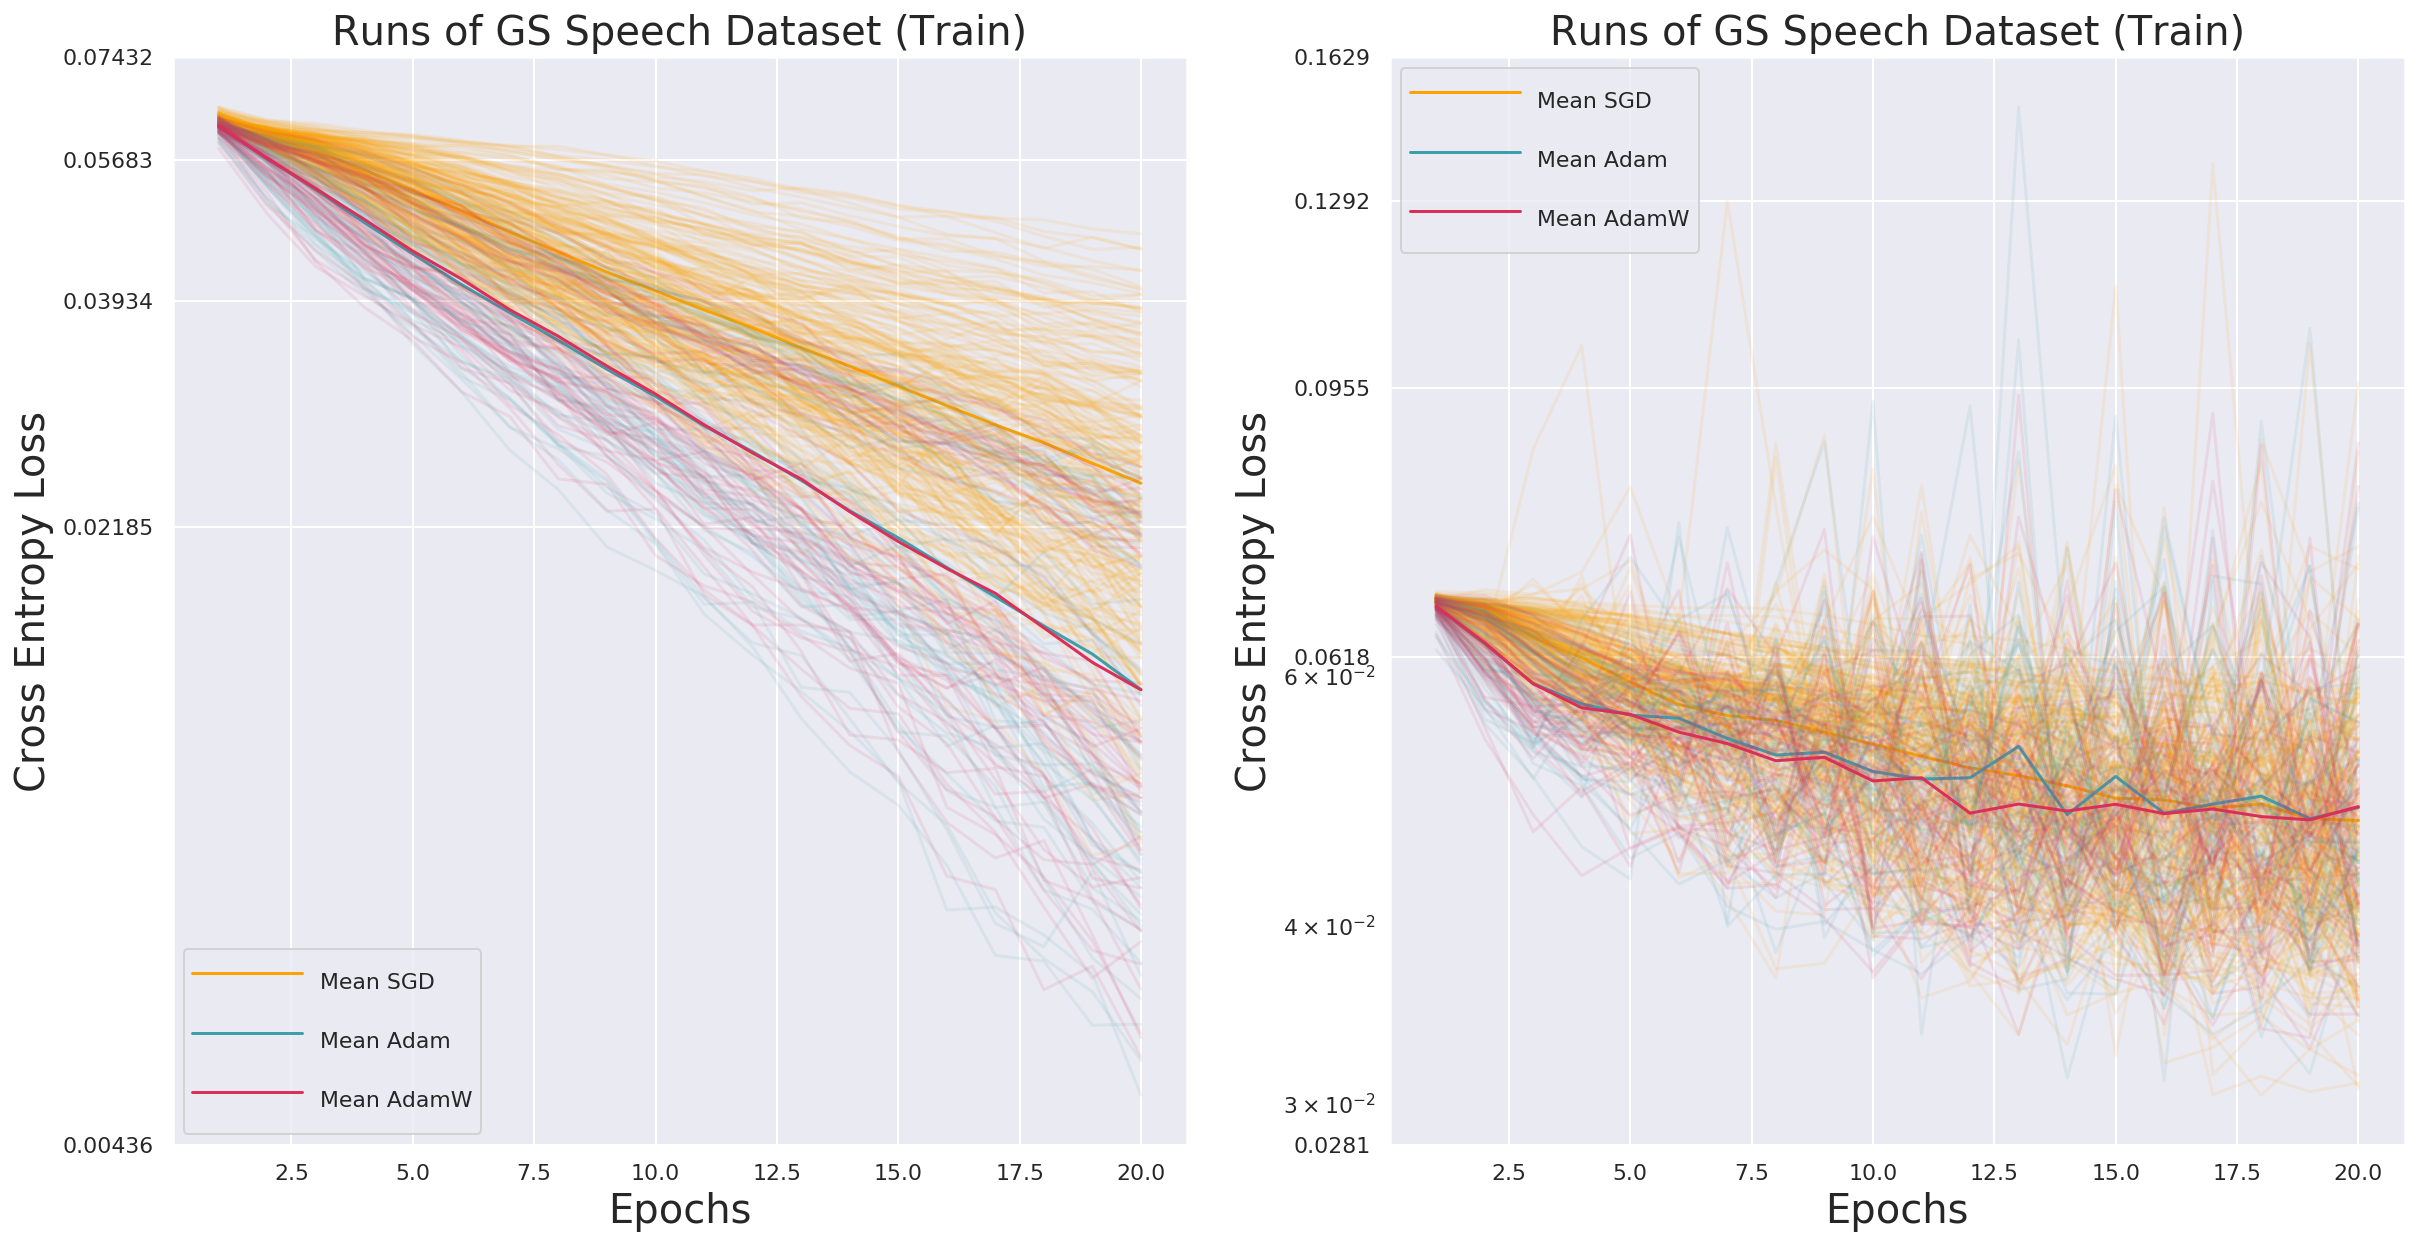

In [17]:
fig,axes = plt.subplots(1,2,figsize=(20,10))
ax,ax2 = axes
# chose the scale on the axis (linear or log)
ax.set_yscale('log')
#ax.set_xscale('log')
plot_grid_search(df_speech,ax,
                 plot_SGD=True,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="linear",
                 plot_mean=True,
                 train=True)
ax.set_title("Runs of GS Speech Dataset (Train)", fontsize=fontsize)
ax.set_ylabel('Cross Entropy Loss', fontsize=fontsize)
ax.set_xlabel('Epochs', fontsize=fontsize)

# chose the scale on the axis (linear or log)
ax2.set_yscale('log')
#ax.set_xscale('log')
plot_grid_search(df_speech,ax2,
                 plot_SGD=True,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="linear",
                 plot_mean=True,
                 train=False)
ax2.set_title("Runs of GS Speech Dataset (Train)", fontsize=fontsize)
ax2.set_ylabel('Cross Entropy Loss', fontsize=fontsize)
ax2.set_xlabel('Epochs', fontsize=fontsize)

#fig.savefig("../../results/speech_gridsearch_val.png")

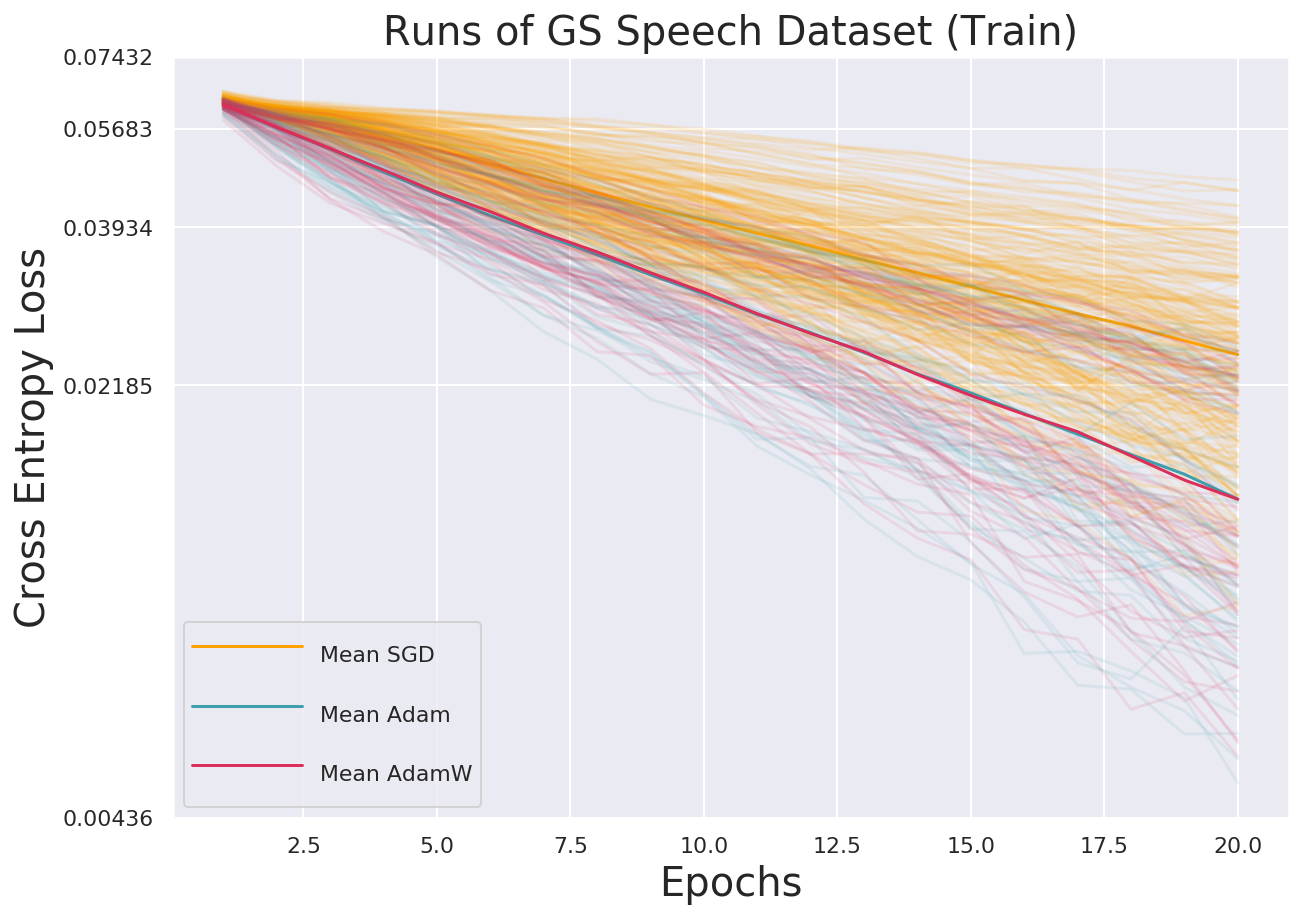

In [29]:
fig,ax = plt.subplots(1,figsize=(10,7))
# chose the scale on the axis (linear or log)
ax.set_yscale('log')
#ax.set_xscale('log')
plot_grid_search(df_speech,ax,
                 plot_SGD=True,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="linear",
                 plot_mean=True,
                 train=True)
ax.set_title("Runs of GS Speech Dataset (Train)", fontsize=fontsize)
ax.set_ylabel('Cross Entropy Loss', fontsize=fontsize)
ax.set_xlabel('Epochs', fontsize=fontsize)


fig.savefig("../../results/speech_gridsearch_train.png")

### Test set

Text(0.5, 0, 'Epochs')

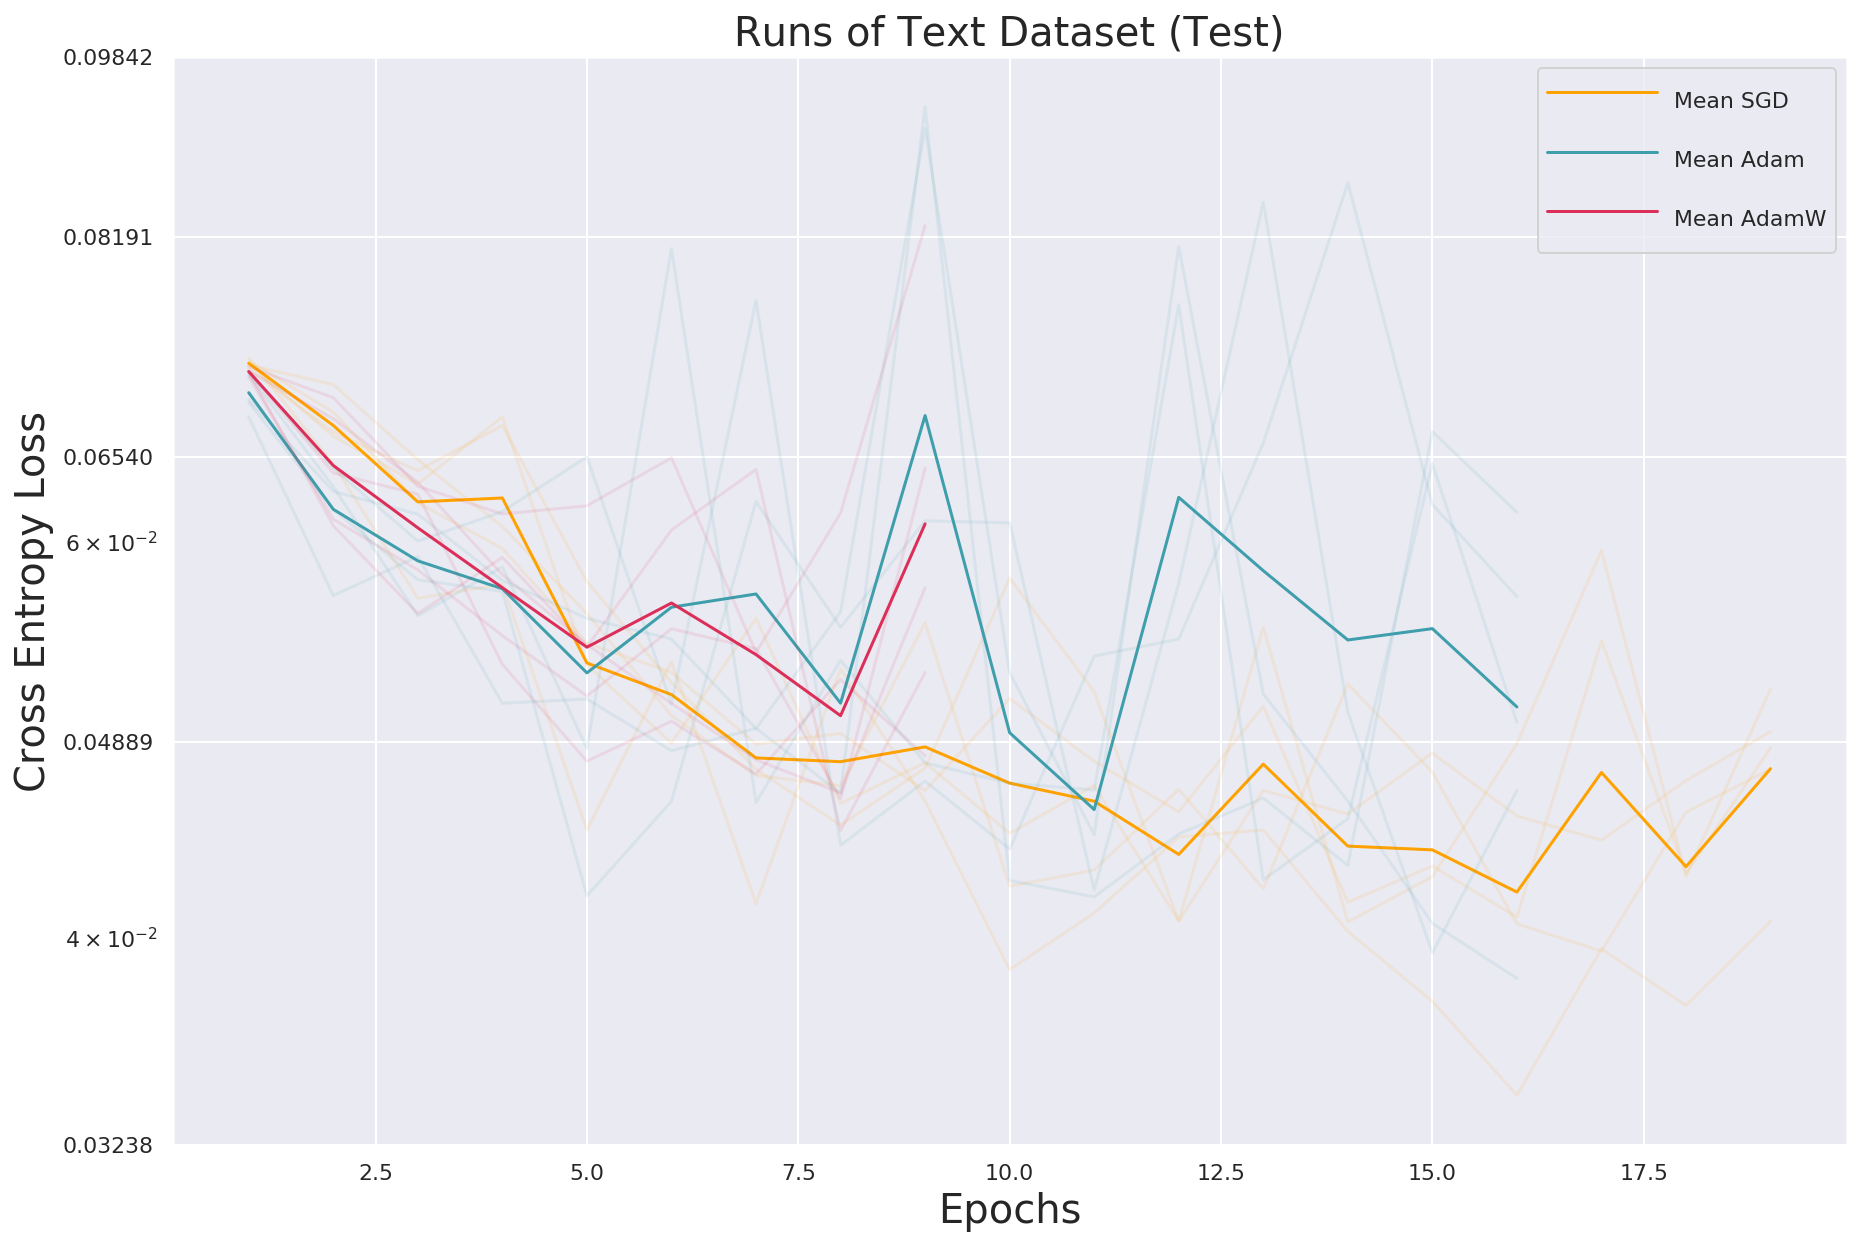

In [18]:
fig,ax = plt.subplots(1,figsize=(15,10))
# chose the scale on the axis (linear or log)
ax.set_yscale('log')
#ax.set_xscale('log')
plot_grid_search_test(df_speech_test,ax,
                 plot_SGD=True,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="log",
                 plot_mean=True,
                 train=False)
ax.set_title("Runs of Text Dataset (Test)", fontsize=fontsize)
ax.set_ylabel('Cross Entropy Loss', fontsize=fontsize)
ax.set_xlabel('Epochs', fontsize=fontsize)
#fig.savefig("../../results/test_text_val.png")

## Total overall

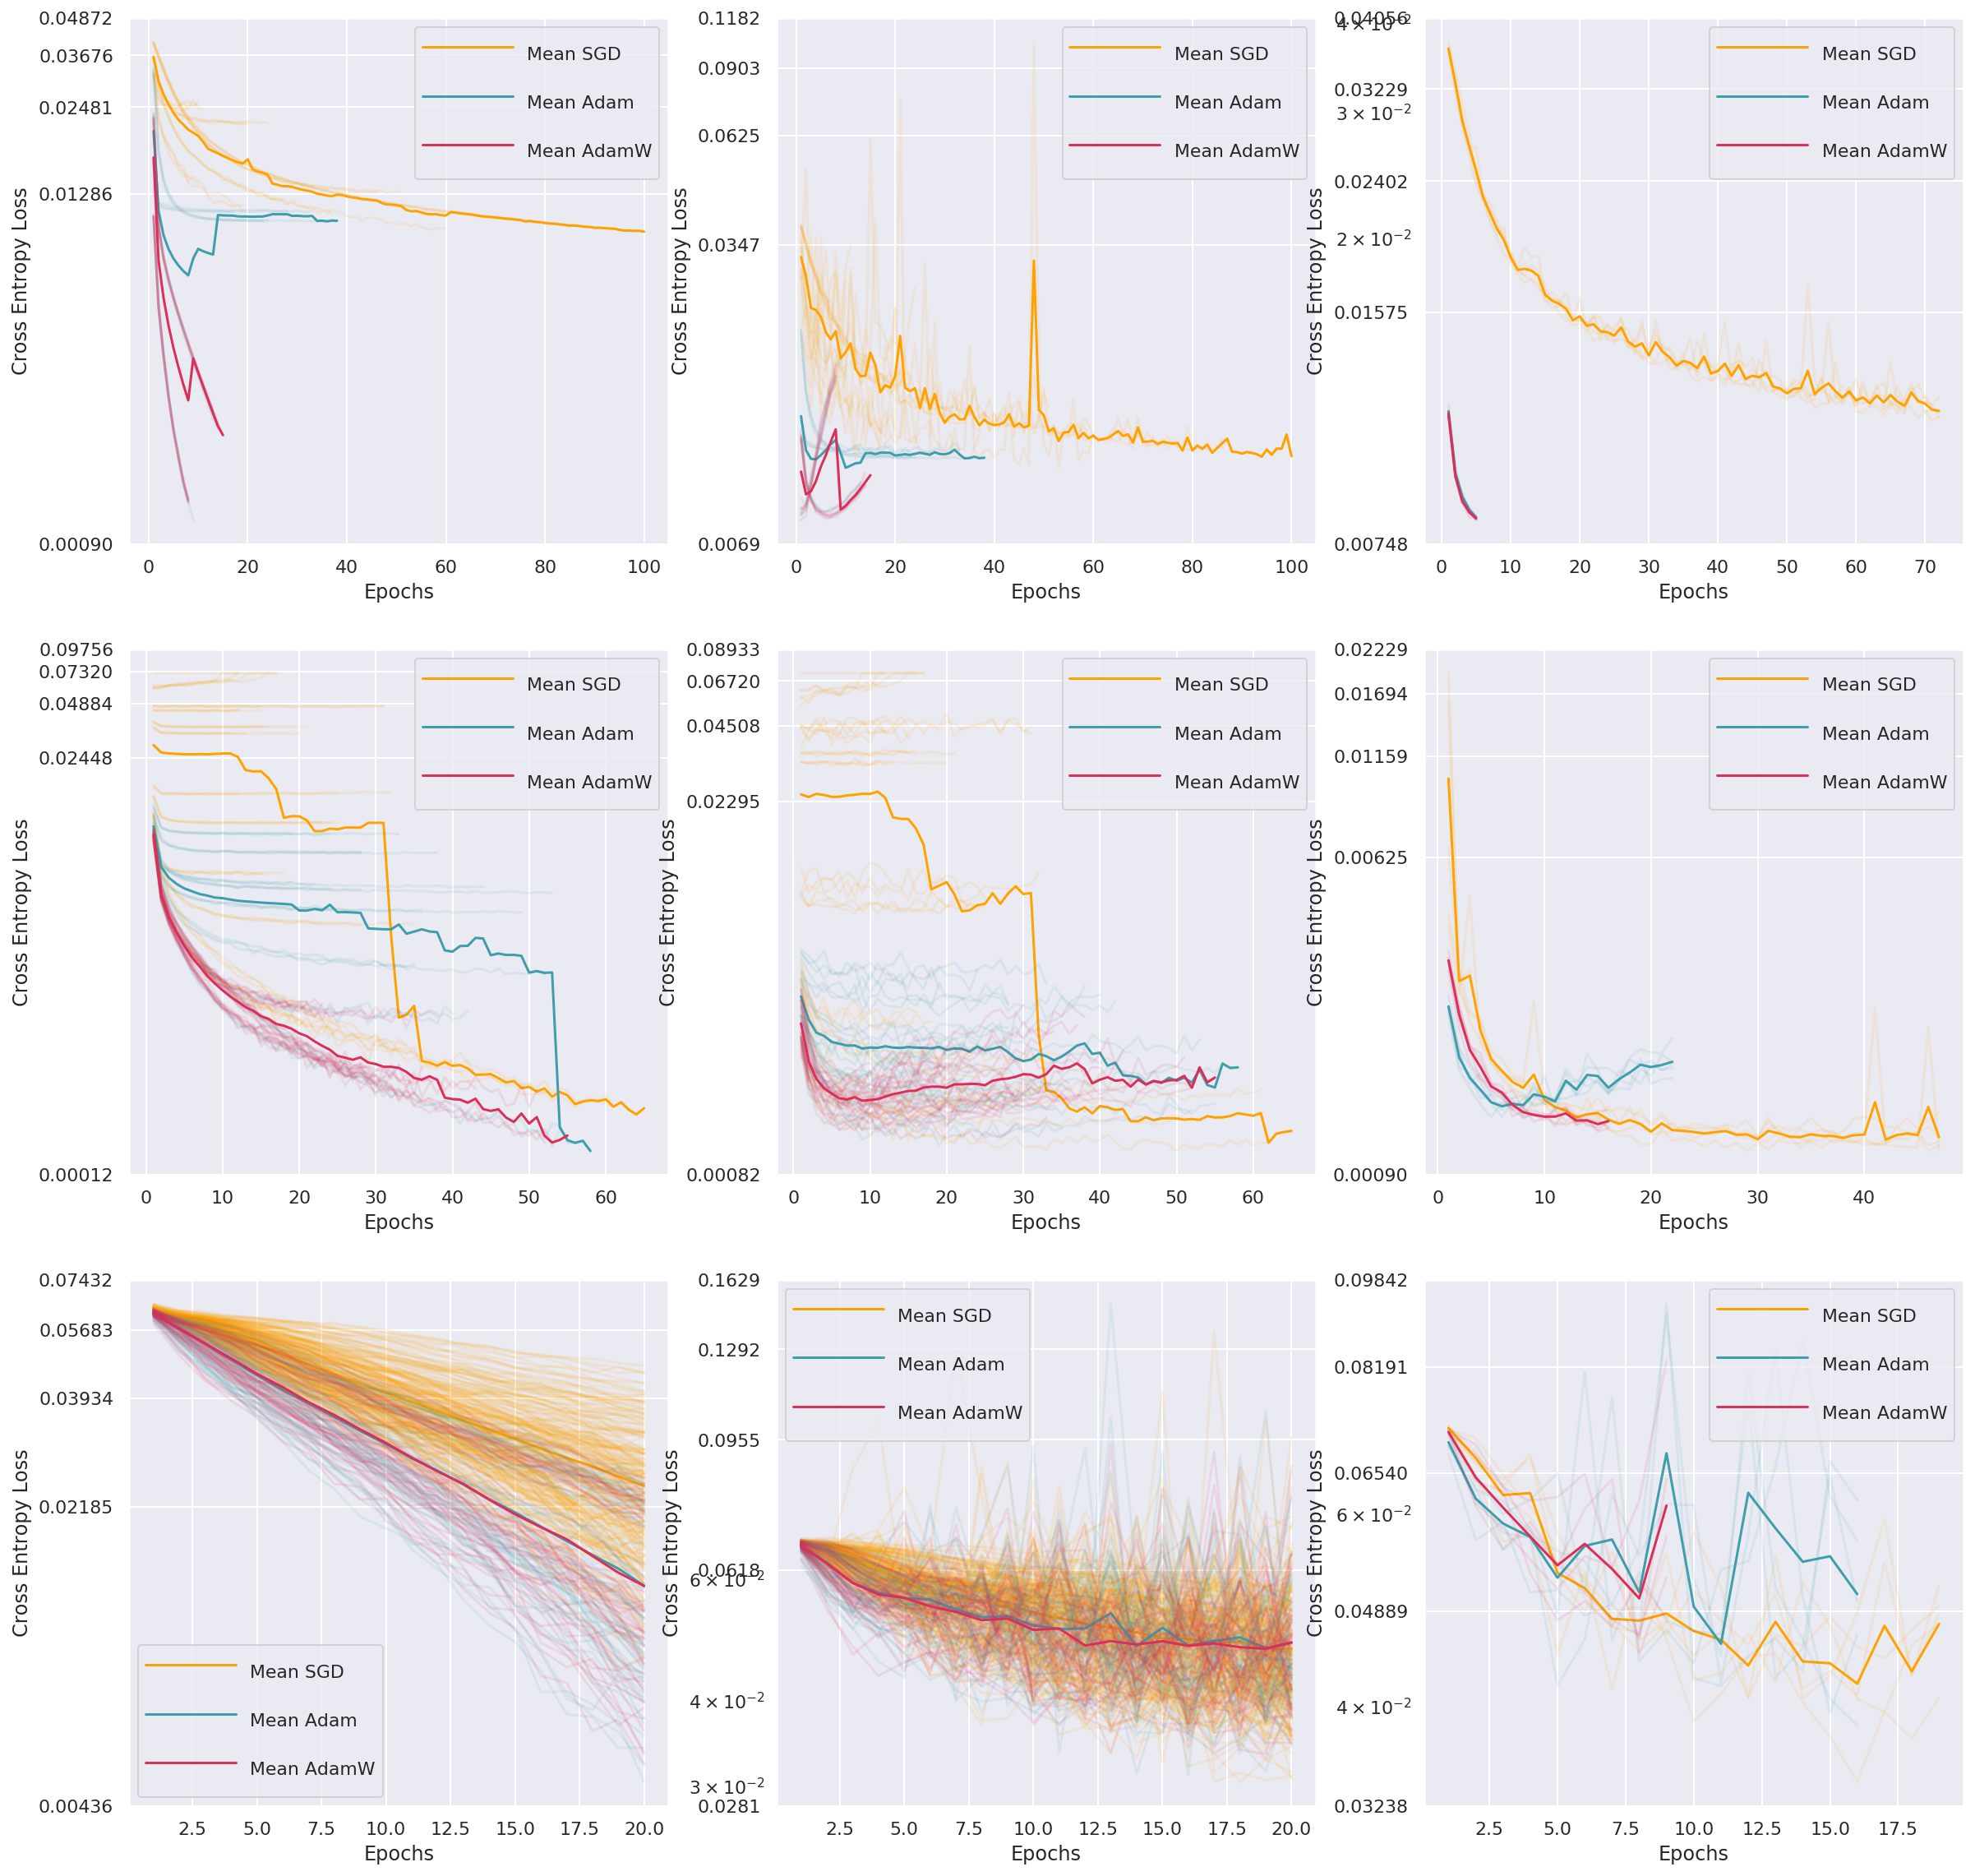

In [22]:
fig,axes = plt.subplots(3,3,figsize=(20,20))
axes = axes.flatten()
for ax in axes:
    ax.set_yscale('log')
plot_grid_search(df_text,axes[0],
                 plot_SGD=True,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="log",
                 plot_mean=True,
                 train=True)
#
plot_grid_search(df_text,axes[1],
                 plot_SGD=True,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="log",
                 plot_mean=True,
                 train=False)
#
plot_grid_search_test(df_text_test,axes[2],
                 plot_SGD=True,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="log",
                 plot_mean=True,
                 train=False)

plot_grid_search(df_image,axes[3],
                 plot_SGD=True,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="log",
                 plot_mean=True,
                 train=True)
#
plot_grid_search(df_image,axes[4],
                 plot_SGD=True,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="log",
                 plot_mean=True,
                 train=False)
#
plot_grid_search_test(df_image_test,axes[5],
                 plot_SGD=True,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="log",
                 plot_mean=True,
                 train=False)
#
plot_grid_search(df_speech,axes[6],
                 plot_SGD=True,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="log",
                 plot_mean=True,
                 train=True)
#
plot_grid_search(df_speech,axes[7],
                 plot_SGD=True,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="log",
                 plot_mean=True,
                 train=False)
#
plot_grid_search_test(df_speech_test,axes[8],
                 plot_SGD=True,
                 plot_Adam=True,
                 plot_AdamW=True,
                 plot_runs=True,
                 plot_fit=False,
                 fit_type="log",
                 plot_mean=True,
                 train=False)
fig.savefig("../../results/overall.png")